In [65]:
import numpy as np
import pandas as pd
import os

import matplotlib.pylab as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from keras.layers import BatchNormalization, Dropout
from keras.layers import Dense, Activation
from tensorflow import keras
import seaborn as sns
from sklearn.metrics import classification_report

In [66]:
df = pd.concat([pd.read_csv(f'{i}.csv', header=None) for i in range(4)], axis=0)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,26.0,4.0,5.0,8.0,-1.0,-13.0,-109.0,-66.0,-9.0,2.0,...,-28.0,61.0,4.0,8.0,5.0,4.0,-7.0,-59.0,16.0,0
1,-47.0,-6.0,-5.0,-7.0,13.0,-1.0,35.0,-10.0,10.0,-4.0,...,-25.0,47.0,6.0,6.0,5.0,13.0,21.0,111.0,15.0,0
2,-19.0,-8.0,-8.0,-8.0,-21.0,-6.0,-79.0,12.0,0.0,5.0,...,-83.0,7.0,7.0,1.0,-8.0,7.0,21.0,114.0,48.0,0
3,2.0,3.0,0.0,2.0,0.0,22.0,106.0,-14.0,-16.0,-2.0,...,-38.0,-11.0,4.0,7.0,11.0,33.0,39.0,119.0,43.0,0
4,6.0,0.0,0.0,-2.0,-14.0,10.0,-51.0,5.0,7.0,0.0,...,38.0,-35.0,-8.0,2.0,6.0,-13.0,-24.0,-112.0,-69.0,0


In [67]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
count,11678.000000,11678.000000,11678.000000,11678.000000,11678.000000,11678.000000,11678.000000,11678.000000,11678.000000,11678.000000,...,11678.000000,11678.000000,11678.000000,11678.000000,11678.000000,11678.000000,11678.000000,11678.000000,11678.000000,11678.000000
mean,-0.520380,-0.726837,-0.739082,-0.729748,-0.159103,-0.554890,-1.272649,-0.661843,-0.665953,-0.654222,...,-0.932694,-0.836958,-0.740623,-0.768710,-0.705343,-0.146686,-0.374807,-1.449306,-0.609094,1.503254
std,18.566709,11.766878,4.989944,7.441675,17.850402,25.809528,25.089972,15.408896,18.123854,11.841260,...,15.158993,18.204465,12.005206,4.969758,7.384410,17.841479,25.551082,25.259736,15.530091,1.117541
min,-116.000000,-104.000000,-33.000000,-75.000000,-121.000000,-122.000000,-128.000000,-128.000000,-110.000000,-128.000000,...,-128.000000,-116.000000,-128.000000,-46.000000,-74.000000,-103.000000,-128.000000,-128.000000,-124.000000,0.000000
25%,-9.000000,-4.000000,-3.000000,-4.000000,-10.000000,-15.000000,-6.000000,-8.000000,-9.000000,-4.000000,...,-8.000000,-9.000000,-4.000000,-3.000000,-4.000000,-10.000000,-14.000000,-6.000000,-8.000000,1.000000
50%,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,-1.000000,2.000000
75%,7.000000,3.000000,2.000000,3.000000,10.000000,13.000000,4.000000,6.000000,6.000000,3.000000,...,6.000000,6.000000,3.000000,2.000000,3.000000,10.000000,13.000000,3.000000,6.000000,3.000000
max,111.000000,90.000000,34.000000,55.000000,92.000000,127.000000,127.000000,126.000000,127.000000,106.000000,...,114.000000,127.000000,105.000000,29.000000,51.000000,110.000000,127.000000,127.000000,127.000000,3.000000


In [68]:
df.shape

(11678, 65)

In [69]:
x = df.loc[:,0:63]
y = df[64]

In [70]:
y.unique()

array([0, 1, 2, 3])

In [71]:
x = np.array(x)
y = np.array(y)

In [72]:
x = x.reshape(x.shape[0]*x.shape[1], 1)

In [73]:
sc = StandardScaler()
x = sc.fit_transform(x)

In [74]:
x = x.reshape((-1, 8, 8))

In [75]:
print(x.shape, y.shape)

(11678, 8, 8) (11678,)


In [76]:
y = np.eye(np.max(y) + 1)[y]

In [77]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42,stratify=y)

In [78]:
print(x_train.shape, y_train.shape)


(8758, 8, 8) (8758, 4)


In [79]:
print(x_test.shape, y_test.shape)

(2920, 8, 8) (2920, 4)


In [80]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 8)))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
model.add(Dense(units = 64))
model.add(Dense(units = 128))
model.add(Dense(units = 4, activation="softmax"))
model.compile(optimizer = "adam" , loss = "binary_crossentropy", metrics=["accuracy"])
model.summary()

/Users/a1/Desktop/dev/math_modeling/.venv/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_8 (LSTM)                   │ (None, 8, 50)          │        11,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 8, 50)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_9 (LSTM)                   │ (None, 8, 50)          │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 8, 50)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_10 (LSTM)                  │ (None, 8, 50)          │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 8, 50)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_11 (LSTM)                  │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         3,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 84,500 (330.08 KB)

 Trainable params: 84,500 (330.08 KB)

 Non-trainable params: 0 (0.00 B)

In [81]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)

In [82]:
history=model.fit(
    x_train, 
    y_train, 
    epochs=20, 
    batch_size=32, 
    verbose=2, 
    callbacks=[callback],
    validation_split=0.2
)

Epoch 1/20
219/219 - 4s - 19ms/step - accuracy: 0.5147 - loss: 0.4147 - val_accuracy: 0.7997 - val_loss: 0.2522
Epoch 2/20
219/219 - 2s - 8ms/step - accuracy: 0.8865 - loss: 0.1569 - val_accuracy: 0.9446 - val_loss: 0.0936
Epoch 3/20
219/219 - 2s - 8ms/step - accuracy: 0.9348 - loss: 0.0961 - val_accuracy: 0.9481 - val_loss: 0.0796
Epoch 4/20
219/219 - 2s - 8ms/step - accuracy: 0.9510 - loss: 0.0754 - val_accuracy: 0.9492 - val_loss: 0.0776
Epoch 5/20
219/219 - 2s - 8ms/step - accuracy: 0.9552 - loss: 0.0687 - val_accuracy: 0.9509 - val_loss: 0.0658
Epoch 6/20
219/219 - 2s - 9ms/step - accuracy: 0.9609 - loss: 0.0601 - val_accuracy: 0.9549 - val_loss: 0.0640
Epoch 7/20
219/219 - 2s - 8ms/step - accuracy: 0.9659 - loss: 0.0567 - val_accuracy: 0.9595 - val_loss: 0.0531
Epoch 8/20
219/219 - 2s - 8ms/step - accuracy: 0.9687 - loss: 0.0496 - val_accuracy: 0.9669 - val_loss: 0.0516
Epoch 9/20
219/219 - 2s - 8ms/step - accuracy: 0.9719 - loss: 0.0450 - val_accuracy: 0.9640 - val_loss: 0.0543


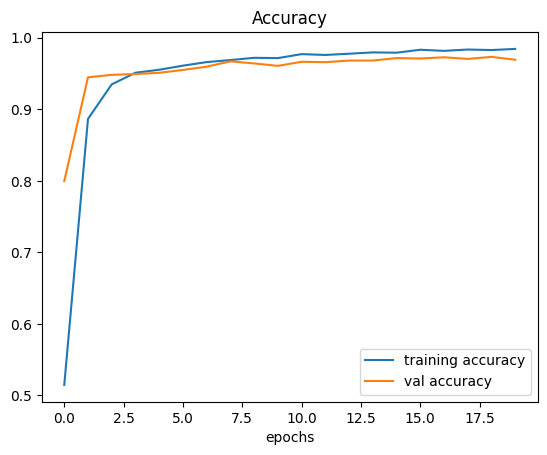

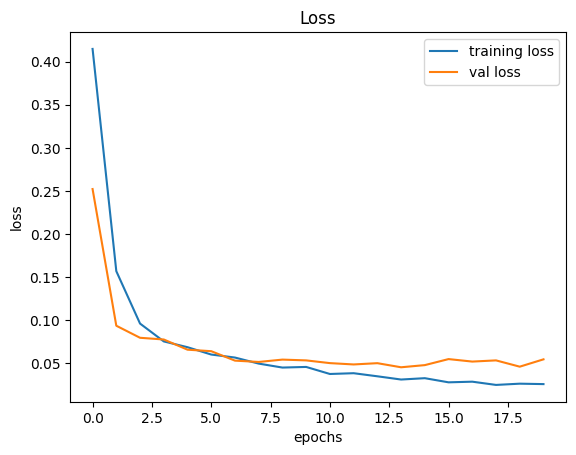

In [83]:
plt.figure(0)

plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.legend()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

In [84]:
Y_pred = model.predict(x_test)
Y_pred_classes = np.argmax(Y_pred, axis=1)
Y_true = np.argmax(y_test, axis = 1)

92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [86]:
print(classification_report(Y_true, Y_pred_classes))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       727
           1       0.98      0.97      0.97       726
           2       0.95      0.95      0.95       736
           3       0.94      0.96      0.95       731

    accuracy                           0.97      2920
   macro avg       0.97      0.97      0.97      2920
weighted avg       0.97      0.97      0.97      2920

